The following objects are masked from diabetes (pos = 4):

    x, x2, y



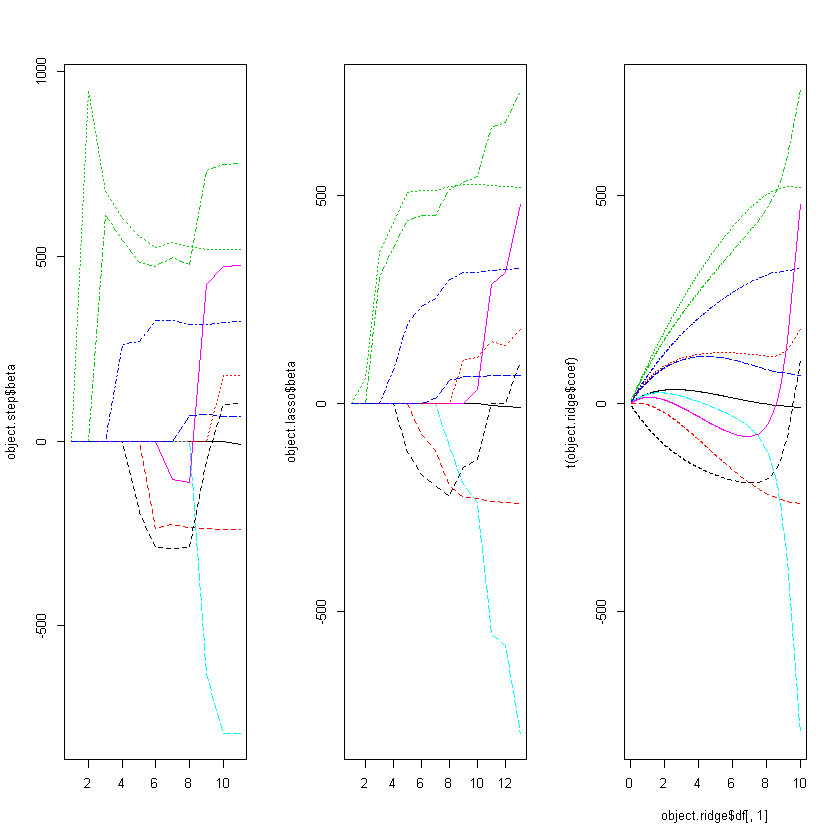

In [4]:
library(lars)
data(diabetes)
par(mfrow=c(1,2))
attach(diabetes)
object.step <- lars(x,y,type="stepwise")
object.lasso <- lars(x,y,type="lasso")

library(ridge)
lambda <- seq(from=1,to=0,length=100)
lambda <- seq(from=100,to=0,length=10000)
object.ridge <- linearRidge(y ~ x,lambda=lambda)

detach(diabetes)

par(mfcol=c(1,3))
matplot(object.step$beta,type="l")
matplot(object.lasso$beta,type="l")
matplot(object.ridge$df[,1],t(object.ridge$coef),type="l")
par(mfcol=c(1,1))

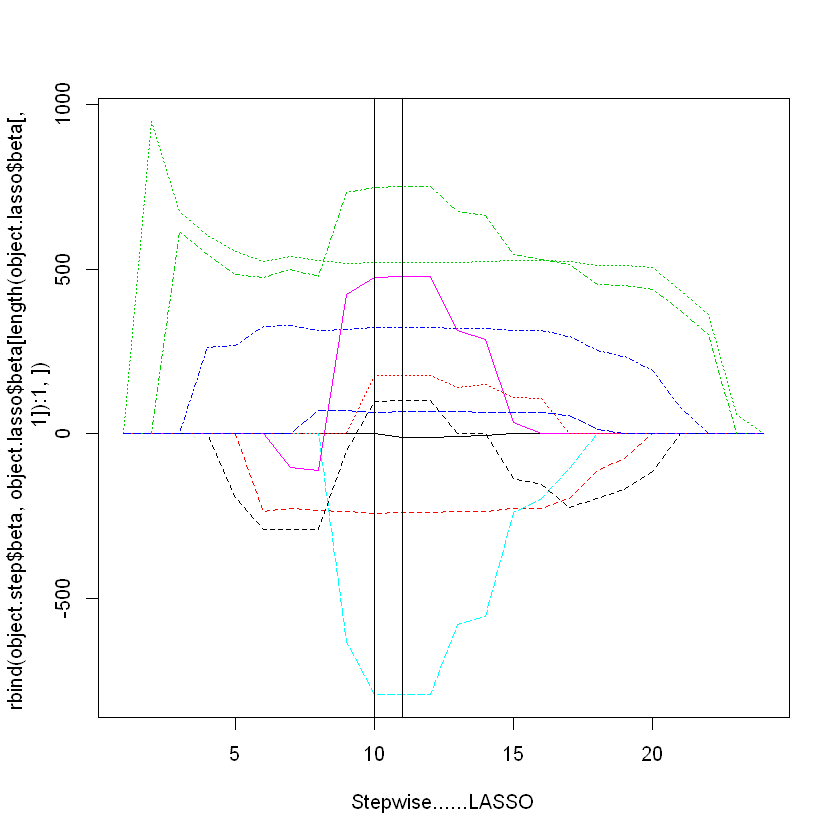

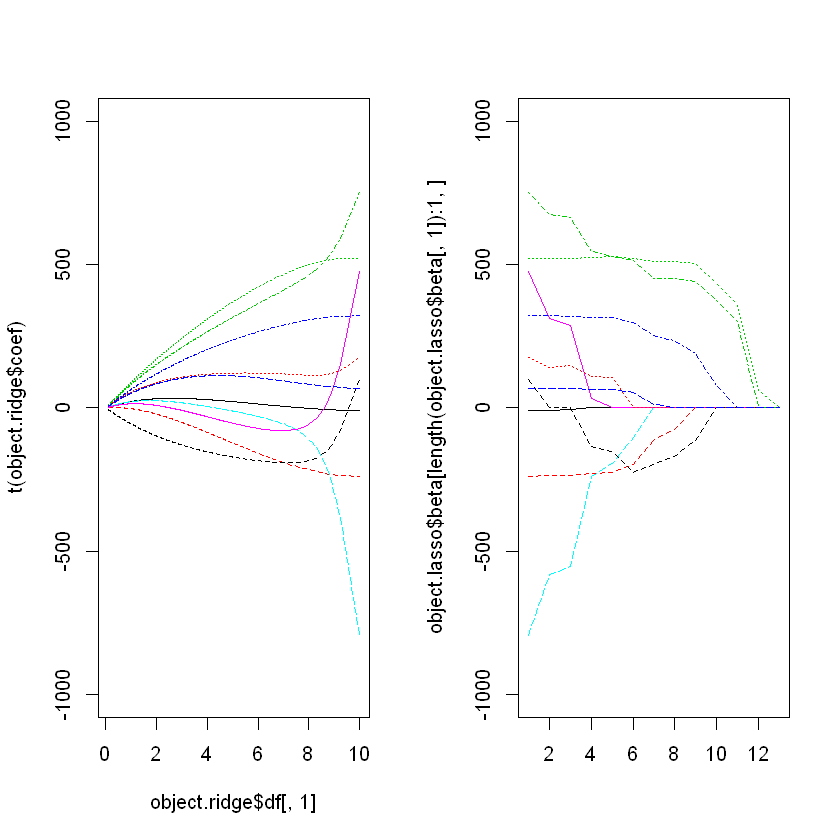

In [5]:
matplot(rbind(object.step$beta,object.lasso$beta[length(object.lasso$beta[,1]):1,]),type="l",xlab="Stepwise......LASSO")
abline(v = c(0,1)+length(object.step$beta[1,]))

par(mfcol=c(1,2))

matplot(object.ridge$df[,1],t(object.ridge$coef),type="l",ylim=c(-1000,1000))
matplot(object.lasso$beta[length(object.lasso$beta[,1]):1,],type="l",ylim=c(-1000,1000))
par(mfcol=c(1,1))
#matplot(object.lasso$beta,type="l")

The last step of stepwise method returns the same result with LASSO and Ridge with their regularization parameter $\lambda = 0$. How do the plots show this phenomenon? This "goal" is "Full Model".

この一致は、最初の3つのプロットが右端で色も込めて同じ値をとっていることで表されている。4つ目のプロットがStepwiseとLASSOの右端の比較で、5つ目と6つ目のプロットがRidgeとLASSOの右端の比較になっている。

How do the plots show "subset selection" of stepwise and LASSO methods ?

グラフが$y=0$と一致している部分がこれを表す。subset selectionによって参照されていない変数には重みがつかないため。各グラフが$y=0$から等間隔で上下に分かれていく様子が、ワンステップごとに参照する変数を増やしていくことと対応している。

How do the plots show "no subset selection" of Ridge method?

各グラフが$(x,y)=(0,0)$のすぐ右から上下に枝分かれしていることがこれを表す。

Parameter k of kNN method is a smoothing parameter for vias-variance tradeoff. See kNN Classification and desicribe k as a regularization factor.

kNN methodは$k$人での多数決で境界を決定する。$k>1$の時、少数のノイズや外れ値の影響が除かれ、overfittingを回避できる。このような役割を持つパラメータをregularization factorと呼ぶ。